# Social Buzz Analysis

***

## Project Description

Social Buzz - Social media & content creation

Social Buzz emphasizes content by keeping all users anonymous, only tracking user reactions on every piece of content. There are over 100 ways that users can react to content, spanning beyond the traditional reactions of likes, dislikes, and comments.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|User |	|
|Profile |	|
|Location |	|
|Session |	|
|Content |	|
|Reaction |	|
|ReactionTypes |	|

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("User.csv")

In [3]:
df1

,User ID,Name,Email
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com
...,...,...,...
495,1f7e22c8-558a-4b6f-a04f-b219593f029e,Tracey Corbett,TC@gmail.com
496,0d47a133-383b-4a9c-976c-697ac65ccb19,Jennifer Mcintosh,JM@gmail.com
497,db0066e1-83cc-43f3-990b-983010aa5370,Marion Stecklein,MS@gmail.com
498,d6204684-926d-41db-ae9c-a7bf2e76313a,Jeffery Zerbe,JZ@gmail.com


In [4]:
df2 = pd.read_csv("Profile.csv")

In [5]:
df2

,User ID,Interests,Age
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23
2,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,"['technology', 'culture', 'veganism']",2
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,['education'],44
...,...,...,...
495,1f7e22c8-558a-4b6f-a04f-b219593f029e,"['tennis', 'veganism', 'education', 'soccer']",21
496,0d47a133-383b-4a9c-976c-697ac65ccb19,"['healthy eating', 'travel']",5
497,db0066e1-83cc-43f3-990b-983010aa5370,['soccer'],14
498,d6204684-926d-41db-ae9c-a7bf2e76313a,"['public speaking', 'dogs']",24


In [6]:
df3 = pd.read_csv("Location.csv")

In [7]:
df3

,User ID,Address
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"6208 Wright Mountains\nBryantfurt, AR 02531"
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,"534 Williams Turnpike Suite 788\nPort Julie, W..."
2,a8229d24-f219-4930-a382-24049a8f73bb,"867 Lisa Causeway Apt. 015\nWest Brentmouth, A..."
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,"5687 Wilson Harbors Suite 763\nLake Robert, FL..."
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Unit 2614 Box 8996\nDPO AE 23660
...,...,...
495,1f7e22c8-558a-4b6f-a04f-b219593f029e,"710 Tiffany Knoll Suite 379\nCarterport, HI 44352"
496,0d47a133-383b-4a9c-976c-697ac65ccb19,"61708 Terri Walks Suite 867\nEast Dylan, MD 80914"
497,db0066e1-83cc-43f3-990b-983010aa5370,"1944 Gonzalez Cove\nSouth Jason, SD 65716"
498,d6204684-926d-41db-ae9c-a7bf2e76313a,"41287 Miller Isle\nTylermouth, VT 38540"


In [8]:
df4 = pd.read_csv("Session.csv")

In [9]:
df4

,User ID,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,HTC,25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Motorola,68
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Huawei,57
...,...,...,...
495,1f7e22c8-558a-4b6f-a04f-b219593f029e,Motorola,59
496,0d47a133-383b-4a9c-976c-697ac65ccb19,Samsung,23
497,db0066e1-83cc-43f3-990b-983010aa5370,Microsoft,35
498,d6204684-926d-41db-ae9c-a7bf2e76313a,Motorola,99


In [10]:
df5 = pd.read_csv("Content.csv")

In [11]:
df5

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [12]:
df5["User ID"].nunique()

446

In [13]:
df5["Content ID"].nunique()

1000

In [14]:
df5.drop(['User ID','URL'], axis=1, inplace=True)

In [15]:
df5

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [16]:
df6 = pd.read_csv("Reactions.csv")

In [17]:
df6

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,22/4/2021 15:17
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,7/11/2020 9:43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,17/6/2021 12:22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,18/4/2021 5:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,6/1/2021 19:13
...,...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,27/6/2020 9:46
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,16/2/2021 17:17
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,12/9/2020 3:54
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,4/11/2020 20:08


In [18]:
df7 = pd.read_csv("ReactionTypes.csv")

In [19]:
df7

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


### Create two datasets first since there are similar features amongst them

In [20]:
dataset1 = pd.concat([df1,df2,df3,df4], axis=1)

In [21]:
dataset1

,User ID,Name,Email,User ID,Interests,Age,User ID,Address,User ID,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"6208 Wright Mountains\nBryantfurt, AR 02531",4c731e48-0377-4d7d-b4c8-b2174b774ed8,Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23,95258c36-5b6b-4591-85ee-0c43f503c1d5,"534 Williams Turnpike Suite 788\nPort Julie, W...",95258c36-5b6b-4591-85ee-0c43f503c1d5,Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25,a8229d24-f219-4930-a382-24049a8f73bb,"867 Lisa Causeway Apt. 015\nWest Brentmouth, A...",a8229d24-f219-4930-a382-24049a8f73bb,HTC,25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com,8f41c07f-db4f-44f3-ae81-1f99cee047eb,"['technology', 'culture', 'veganism']",2,8f41c07f-db4f-44f3-ae81-1f99cee047eb,"5687 Wilson Harbors Suite 763\nLake Robert, FL...",8f41c07f-db4f-44f3-ae81-1f99cee047eb,Motorola,68
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,['education'],44,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Unit 2614 Box 8996\nDPO AE 23660,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Huawei,57
...,...,...,...,...,...,...,...,...,...,...,...
495,1f7e22c8-558a-4b6f-a04f-b219593f029e,Tracey Corbett,TC@gmail.com,1f7e22c8-558a-4b6f-a04f-b219593f029e,"['tennis', 'veganism', 'education', 'soccer']",21,1f7e22c8-558a-4b6f-a04f-b219593f029e,"710 Tiffany Knoll Suite 379\nCarterport, HI 44352",1f7e22c8-558a-4b6f-a04f-b219593f029e,Motorola,59
496,0d47a133-383b-4a9c-976c-697ac65ccb19,Jennifer Mcintosh,JM@gmail.com,0d47a133-383b-4a9c-976c-697ac65ccb19,"['healthy eating', 'travel']",5,0d47a133-383b-4a9c-976c-697ac65ccb19,"61708 Terri Walks Suite 867\nEast Dylan, MD 80914",0d47a133-383b-4a9c-976c-697ac65ccb19,Samsung,23
497,db0066e1-83cc-43f3-990b-983010aa5370,Marion Stecklein,MS@gmail.com,db0066e1-83cc-43f3-990b-983010aa5370,['soccer'],14,db0066e1-83cc-43f3-990b-983010aa5370,"1944 Gonzalez Cove\nSouth Jason, SD 65716",db0066e1-83cc-43f3-990b-983010aa5370,Microsoft,35
498,d6204684-926d-41db-ae9c-a7bf2e76313a,Jeffery Zerbe,JZ@gmail.com,d6204684-926d-41db-ae9c-a7bf2e76313a,"['public speaking', 'dogs']",24,d6204684-926d-41db-ae9c-a7bf2e76313a,"41287 Miller Isle\nTylermouth, VT 38540",d6204684-926d-41db-ae9c-a7bf2e76313a,Motorola,99


In [22]:
#dataset1.to_csv("client.csv", index=False)

In [23]:
tempdata1 = pd.merge(left=df6, right=df7, how="inner", on="Type")

In [24]:
tempdata1

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,7/11/2020 9:43,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,6/1/2021 19:13,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,9/4/2021 2:46,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,28/3/2021 21:15,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,4/8/2020 5:40,negative,0
...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,d51a3403-8bab-4d88-af4f-a429c6d8c168,adore,4/10/2020 22:26,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,adore,18/9/2020 10:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,89572273-761e-46f3-8b99-1689d98aac90,adore,31/10/2020 3:58,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,adore,25/6/2020 15:12,positive,72


In [25]:
tempdata1["User ID"].nunique()

500

In [26]:
tempdata1["Content ID"].nunique()

962

In [27]:
tempdata1.drop(['User ID','Datetime'], axis=1, inplace=True)

In [28]:
tempdata1

,Content ID,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,negative,0
...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,positive,72


In [29]:
tempdata2 = pd.merge(left=df5, right=tempdata1, how="inner", on="Content ID")

In [30]:
tempdata2

,Content ID,Type_x,Category,Type_y,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12


In [31]:
tempdata2.columns

Index(['Content ID', 'Type_x', 'Category', 'Type_y', 'Sentiment', 'Score'], dtype='object')

In [32]:
tempdata2.columns = ['Content ID', 'Type', 'Category', 'Reaction', 'Sentiment', 'Score']

In [33]:
tempdata2

,Content ID,Type,Category,Reaction,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12


In [34]:
#tempdata2.to_csv("stuff.csv", index=False)

## Data Analysis

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	Unique ID of a user that exists in the User table|
| |	Full name of user|
| |	Email address of user|
| |	Interests of the associated user|
| |	Age of the associated user|
| |	Full address of the user|
| |	Mobile device that they used for this session on the application|
| |	Amount of time in minutes that this user stayed active on the application during this session|

### Users Analysis

In [35]:
df = pd.read_csv("client.csv")

In [36]:
df

,User ID,Name,Email,Interests,Age,Address,Device,Duration
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,"[0, 1]",41,"6208 Wright Mountains\nBryantfurt, AR 02531",Microsoft,11
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,['tennis'],23,"534 Williams Turnpike Suite 788\nPort Julie, W...",Apple,51
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com,"['fitness', 'cooking', 'animals', 'travel']",25,"867 Lisa Causeway Apt. 015\nWest Brentmouth, A...",HTC,25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com,"['technology', 'culture', 'veganism']",2,"5687 Wilson Harbors Suite 763\nLake Robert, FL...",Motorola,68
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com,['education'],44,Unit 2614 Box 8996\nDPO AE 23660,Huawei,57
...,...,...,...,...,...,...,...,...
495,1f7e22c8-558a-4b6f-a04f-b219593f029e,Tracey Corbett,TC@gmail.com,"['tennis', 'veganism', 'education', 'soccer']",21,"710 Tiffany Knoll Suite 379\nCarterport, HI 44352",Motorola,59
496,0d47a133-383b-4a9c-976c-697ac65ccb19,Jennifer Mcintosh,JM@gmail.com,"['healthy eating', 'travel']",5,"61708 Terri Walks Suite 867\nEast Dylan, MD 80914",Samsung,23
497,db0066e1-83cc-43f3-990b-983010aa5370,Marion Stecklein,MS@gmail.com,['soccer'],14,"1944 Gonzalez Cove\nSouth Jason, SD 65716",Microsoft,35
498,d6204684-926d-41db-ae9c-a7bf2e76313a,Jeffery Zerbe,JZ@gmail.com,"['public speaking', 'dogs']",24,"41287 Miller Isle\nTylermouth, VT 38540",Motorola,99


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User ID    500 non-null    object
 1   Name       500 non-null    object
 2   Email      500 non-null    object
 3   Interests  500 non-null    object
 4   Age        500 non-null    int64 
 5   Address    500 non-null    object
 6   Device     500 non-null    object
 7   Duration   500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [38]:
df.describe(include="all")

,User ID,Name,Email,Interests,Age,Address,Device,Duration
count,500,500,500,500,500.00,500,500,500.00
unique,500,500,255,366,NaN,500,13,NaN
top,b841358a-d8ff-412e-b940-3a95fd31291b,Willis Brockman,MS@gmail.com,['science'],NaN,"76066 Darren Village\nPort Tammie, MI 63748",Motorola,NaN
freq,1,1,9,11,NaN,1,77,NaN
mean,NaN,NaN,NaN,NaN,22.29,NaN,NaN,47.71
std,NaN,NaN,NaN,NaN,13.15,NaN,NaN,29.33
min,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,10.75,NaN,NaN,20.75
50%,NaN,NaN,NaN,NaN,23.00,NaN,NaN,48.50
75%,NaN,NaN,NaN,NaN,34.00,NaN,NaN,73.25


In [39]:
df.Device.value_counts()

Motorola     77
Microsoft    77
Huawei       74
HTC          72
Apple        68
Samsung      65
Google       61
ouafw         1
thbhn         1
xtzqw         1
sbnnz         1
qxugb         1
dcppv         1
Name: Device, dtype: int64

## Data Visualization

### Univariate Data Exploration

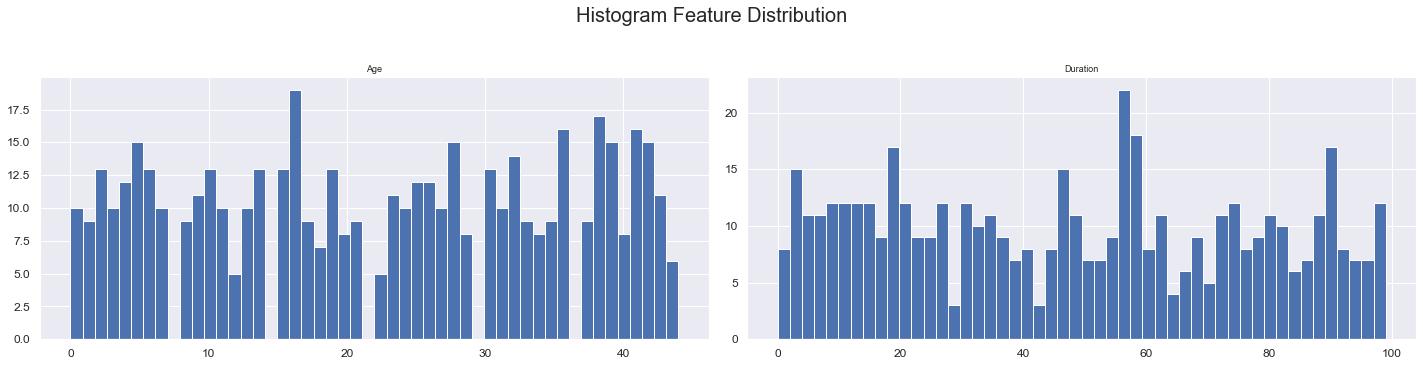

In [40]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

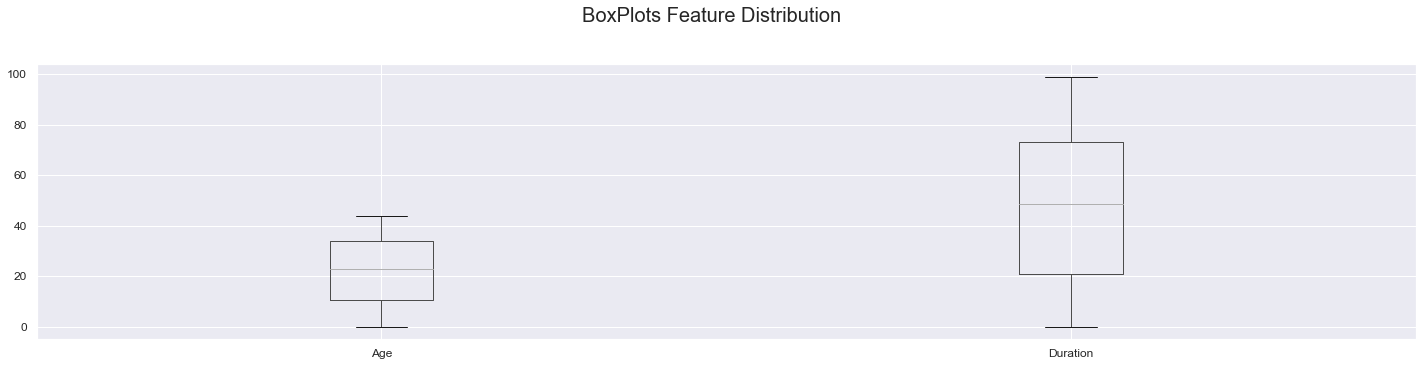

In [41]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

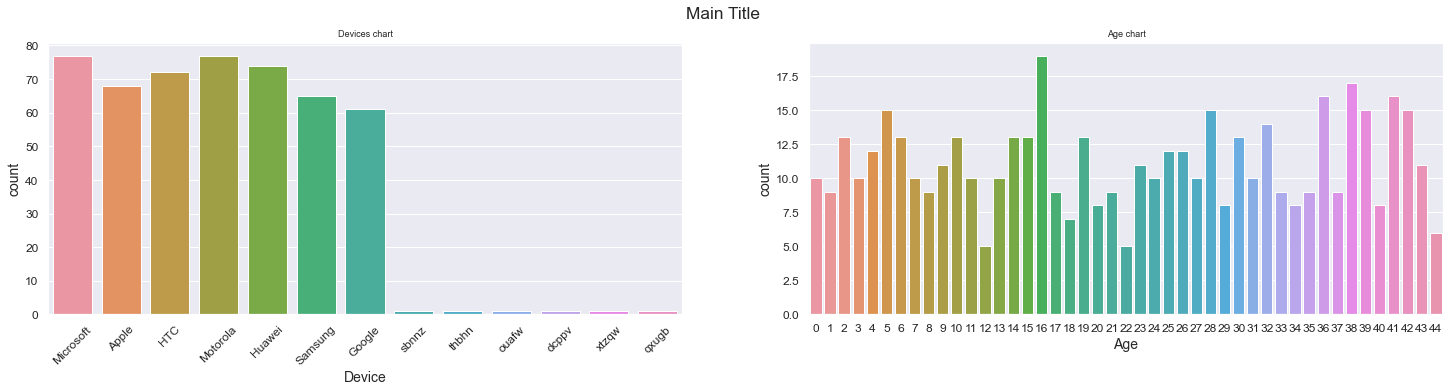

In [42]:
fig, ax = plt.subplots(1,2, sharex=False, figsize=(25,5))
fig.suptitle('Main Title')



sns.countplot(x="Device", data=df, ax=ax[0])
ax[0].set_title('Devices chart')
ax[0].tick_params('x', labelrotation=45)

sns.countplot(x="Age", data=df, ax=ax[1])
ax[1].set_title('Age chart')

plt.show()

### Content Analysis

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Content ID |	Unique ID of the content that was uploaded (automatically generated)|
|Type |	A string detailing the type of content that was uploaded |
|Category |	A string detailing the category that this content is relevant to |
|Reaction |	A string detailing the type of reaction this user gave |
|Sentiment | A string detailing whether this type of reaction is considered as positive, negative or neutral |
|Score | This is a number calculated by Social Buzz that quantifies how “popular” each reaction is. A reaction type with a higher score should be considered as a more popular reaction.|

In [43]:
df2 = pd.read_csv("stuff.csv")

In [44]:
df2

,Content ID,Type,Category,Reaction,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,negative,12


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Category    24573 non-null  object
 3   Reaction    24573 non-null  object
 4   Sentiment   24573 non-null  object
 5   Score       24573 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [46]:
df2.describe(include="all")

,Content ID,Type,Category,Reaction,Sentiment,Score
count,24573,24573,24573,24573,24573,24573.00
unique,962,4,40,16,3,NaN
top,496645a7-64f7-4c56-94f5-a71671cb262e,photo,animals,heart,positive,NaN
freq,48,6589,1765,1622,13807,NaN
mean,NaN,NaN,NaN,NaN,NaN,39.62
std,NaN,NaN,NaN,NaN,NaN,26.04
min,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,15.00
50%,NaN,NaN,NaN,NaN,NaN,35.00
75%,NaN,NaN,NaN,NaN,NaN,65.00


In [47]:
d1 = pd.DataFrame(df2.groupby(['Content ID'])["Type"].count().sort_values(ascending=False).head(5))
d1

,Type
Content ID,
ff883828-a610-492d-8635-8a777eaad25f,48
cd568dd1-70cf-45d6-b495-10eebff8c920,48
7df4b13f-c41a-4c81-88fb-213a6a96acc5,48
67766c84-7d8d-46e2-b2e8-8b0f8dc27193,48
5bb364a6-8646-4cdb-b1cf-09f4125718d8,48


In [48]:
df2.groupby(['Content ID'])["Type"].count().max()

48

In [49]:
df2.groupby(['Content ID'])["Type"].count().min()

1

In [50]:
d2 = pd.DataFrame(df2.groupby(['Content ID']).mean().sort_values(by="Score", ascending=False).head(5))
d2

,Score
Content ID,
ae909545-786e-4089-9ef3-61c3c9fd3efd,75.00
2073855c-fab2-41ee-ad15-d4269b2ac4bd,72.40
ad5ddd13-b8ea-4174-ad71-da1663c7f959,72.33
c59e27e9-0439-4699-8ea0-5e93f662a05d,72.00
e5f1a4c6-2b27-4c8b-ac9a-21bb6ef7c946,70.00


In [51]:
d3 = pd.DataFrame(df2.groupby(['Content ID']).sum().sort_values(by="Score", ascending=False).head(5))
d3

,Score
Content ID,
292051b5-b835-4a60-962a-bddf10da82bd,2273
697af362-e84b-4429-b4ea-4123c6ab44ba,2231
4dd4da35-453e-466d-95ca-b1a7710fac1f,2223
cd568dd1-70cf-45d6-b495-10eebff8c920,2222
31d142d9-4557-4613-bce5-cfe63cd0a3cf,2164


In [52]:
d4 = pd.DataFrame(df2.groupby(['Type'])["Content ID"].count().sort_values(ascending=False))
d4

,Content ID
Type,
photo,6589
video,6245
GIF,6079
audio,5660


In [53]:
d5 = pd.DataFrame(df2.groupby(['Category'])["Content ID"].count().sort_values(ascending=False).head(5))
d5

,Content ID
Category,
animals,1765
healthy eating,1711
technology,1667
science,1662
cooking,1640


In [54]:
d6 = pd.DataFrame(df2.groupby(['Reaction'])["Content ID"].count().sort_values(ascending=False).head(5))
d6

,Content ID
Reaction,
heart,1622
scared,1572
peeking,1559
hate,1552
interested,1549


In [55]:
d7 = pd.DataFrame(df2.groupby(['Sentiment'])["Content ID"].count().sort_values(ascending=False))
d7

,Content ID
Sentiment,
positive,13807
negative,7695
neutral,3071


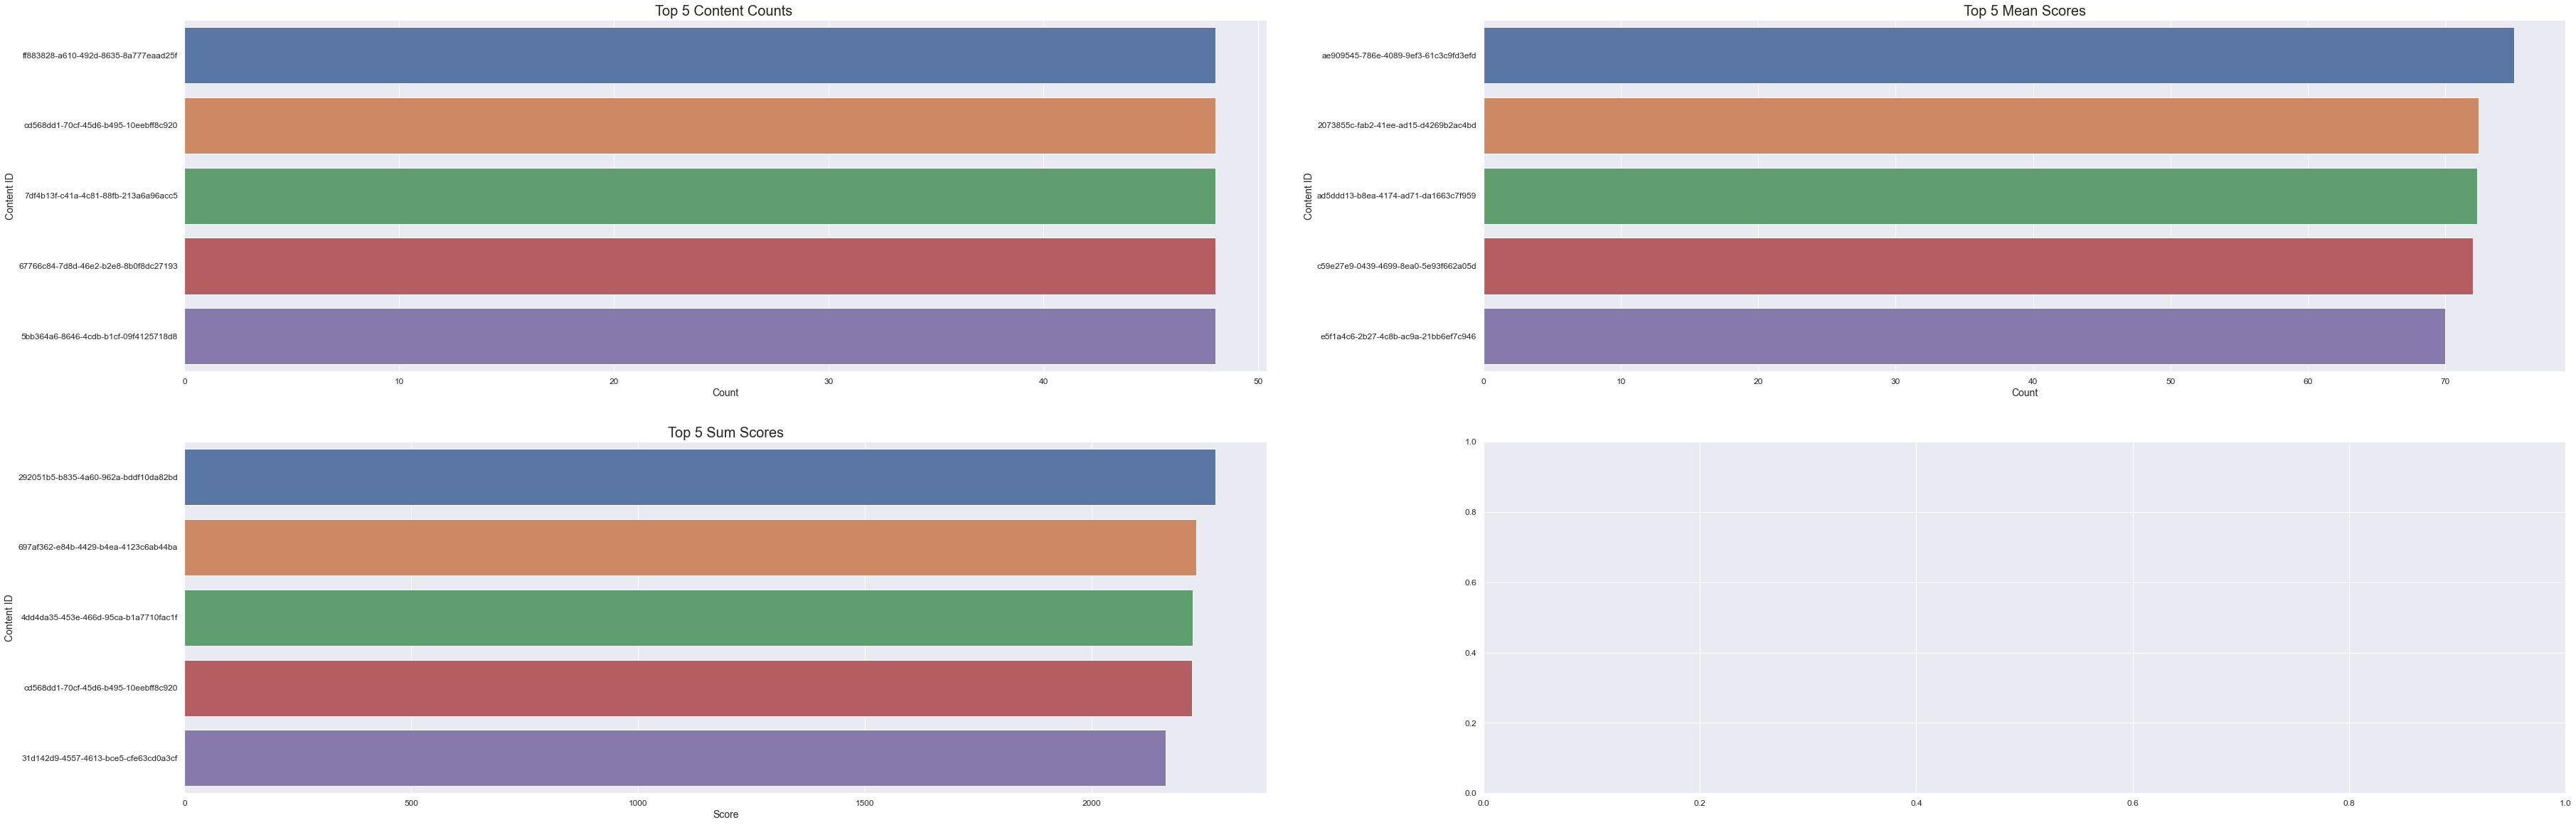

In [56]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(60,20))
fig.suptitle('', y=0.5)

sns.barplot(x="Type", y=d1.index, data=d1, ax=ax1)
ax1.set_xlabel("Count")
ax1.set_title('Top 5 Content Counts ', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.barplot(x="Score", y=d2.index, data=d2, ax=ax2)
ax2.set_xlabel("Count")
ax2.set_title('Top 5 Mean Scores', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.barplot(x="Score", y=d3.index, data=d3, ax=ax3)
ax3.set_title('Top 5 Sum Scores', size=20)
#ax3.tick_params('x', labelrotation=45)


# sns.countplot(x="Resolved", data=d4, ax=ax4)
# ax4.set_title('Title of the fourth chart', size=20)
# #ax4.tick_params('x', labelrotation=45)


plt.show()

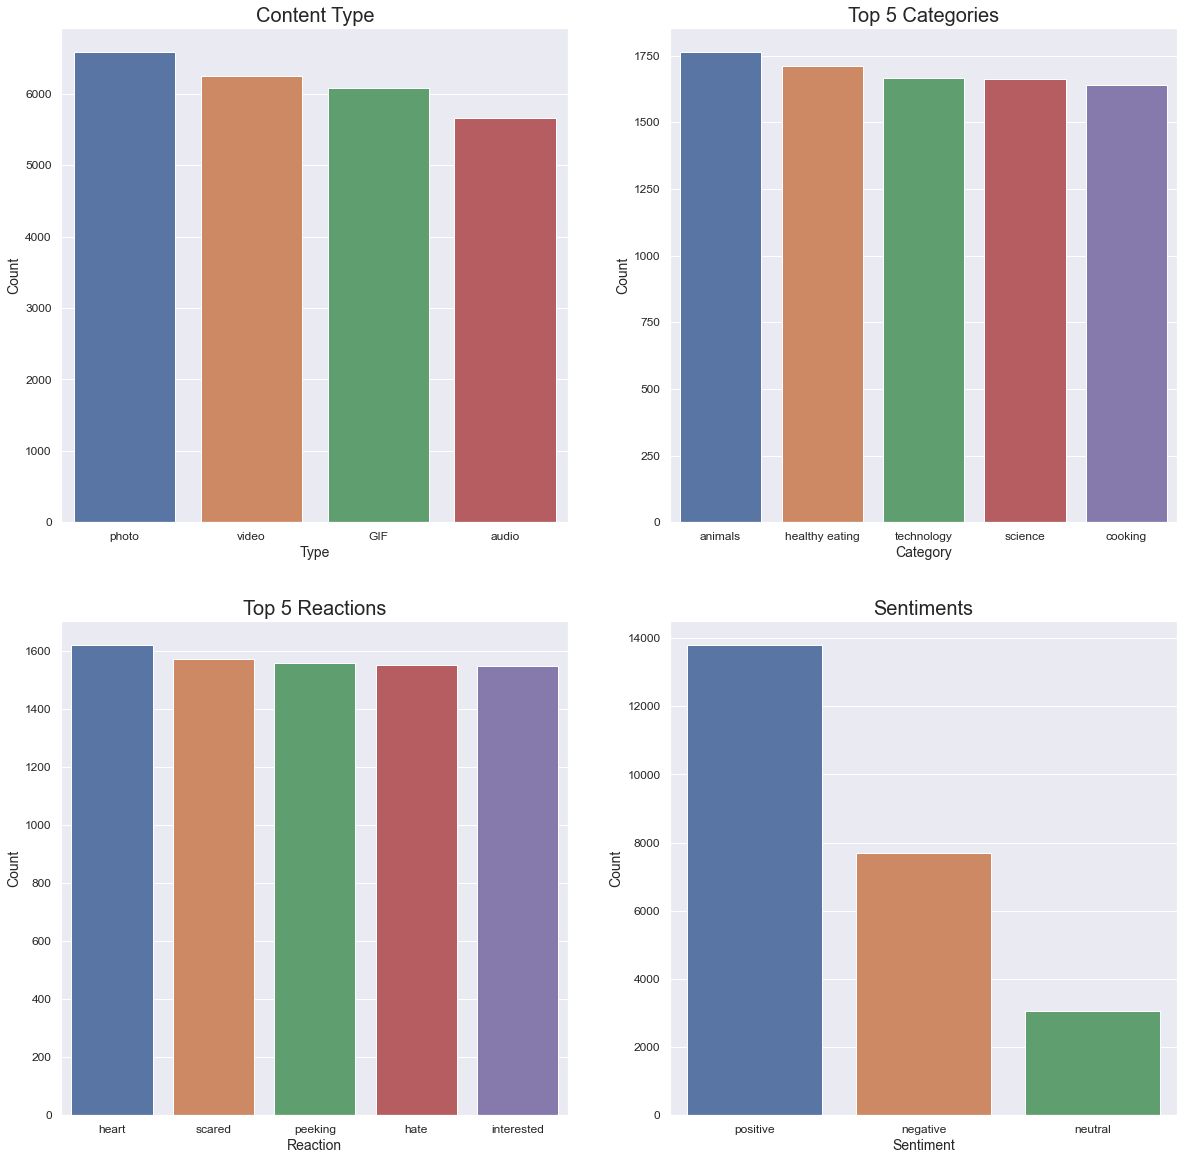

In [57]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('', y=0.5)

sns.barplot(x=d4.index, y="Content ID", data=d4, ax=ax1)
ax1.set_ylabel("Count")
ax1.set_title('Content Type', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.barplot(x=d5.index, y="Content ID", data=d5, ax=ax2)
ax2.set_ylabel("Count")
ax2.set_title('Top 5 Categories', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.barplot(x=d6.index, y="Content ID", data=d6, ax=ax3)
ax3.set_title('Top 5 Reactions', size=20)
ax3.set_ylabel("Count")
#ax3.tick_params('x', labelrotation=45)


sns.barplot(x=d7.index, y="Content ID", data=d7, ax=ax4)
ax4.set_title('Sentiments', size=20)
ax4.set_ylabel("Count")
#ax4.tick_params('x', labelrotation=45)


plt.show()

#### Python code done by Dennis Lam